Example notebook to showcase the use of the eccDefinition module. Please do not commit your local changes

In [1]:
import sys
sys.path.append("../src/")

In [2]:
from eccDefinitionUsingFrequency import measureEccentricityUsingFrequency
from eccDefinitionUsingAmplitude import measureEccentricityUsingAmplitude
from eccDefinitionUsingResidualAmplitude import measureEccentricityUsingResidualAmplitude

In [3]:
from eccDefinition import generate_waveform

In [4]:
t, strain = generate_waveform(approximant="EccentricTD",
                                  q=1.0,
                                  chi1=[0.0, 0.0, 0.0],
                                  chi2=[0.0, 0.0, 0.0],
                                  deltaTOverM=0.1,
                                  Momega0=0.01,
                                  eccentricity=0.1)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import gwtools

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


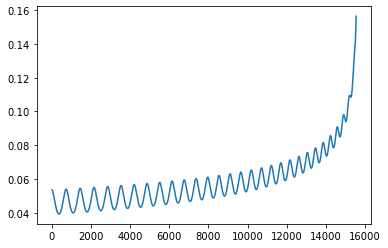

In [6]:
plt.plot(t, np.abs(strain))

In [7]:
ylm = gwtools.harmonics.sYlm(-2, 2, 2, 0, 0)
ylm

(0.6307831305050401+0j)

In [8]:
mode_dict = {(2, 2): strain / ylm}

In [9]:
dataDict = {"t": t, "hlm": mode_dict}

### Measure eccentricity using frequency

In [10]:
eccFreq = measureEccentricityUsingFrequency(dataDict)

In [11]:
eccFreq.measure_ecc(t_ref=-1000)

(array(0.04759875), array(4.9175428))

In [12]:
eccFreq.time

array([-15500.11916323, -15500.01916323, -15499.91916323, ...,
           39.98083677,     40.08083677,     40.18083677])

In [13]:
ts = np.arange(-14000, -500)

In [14]:
eccFreq.measure_ecc(t_ref=ts)

(array([0.10902188, 0.10901938, 0.10901689, ..., 0.03810619, 0.03807279,
        0.03803924]),
 array([0.44167216, 0.45055549, 0.45943883, ..., 2.06740739, 2.08847777,
        2.10954814]))

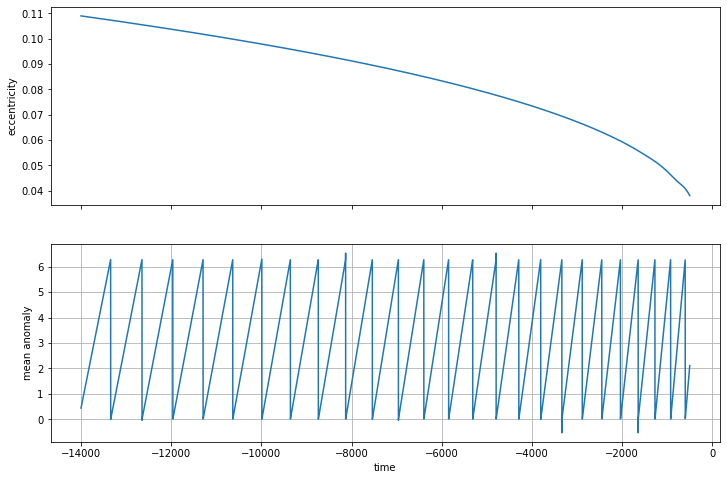

In [15]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
ax[0].plot(ts, eccFreq.measure_ecc(t_ref=ts)[0])
ax[1].plot(ts, eccFreq.measure_ecc(t_ref=ts)[1])

ax[1].set_xlabel("time")
ax[0].set_ylabel("eccentricity")
ax[1].set_ylabel("mean anomaly")
ax[1].grid()

Text(0, 0.5, 'omega_22')

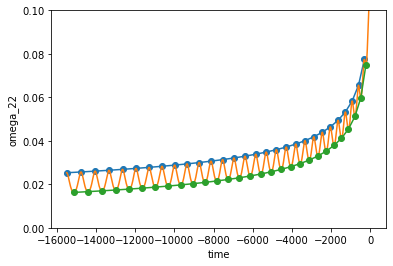

In [16]:
plt.plot(eccFreq.time[eccFreq.find_peaks(order=10)], eccFreq.omega22[eccFreq.find_peaks(order=10)], marker="o")
plt.plot(eccFreq.time, eccFreq.omega22)
plt.plot(eccFreq.time[eccFreq.find_troughs(order=10)], eccFreq.omega22[eccFreq.find_troughs(order=10)], marker="o")
plt.ylim(0, 0.1)
plt.xlabel("time")
plt.ylabel("omega_22")

### measuring eccentricity using amplitude

In [17]:
eccAmp = measureEccentricityUsingAmplitude(dataDict)

In [18]:
eccAmp.measure_ecc(t_ref=-1000), eccFreq.measure_ecc(t_ref=-1000)

((array(0.04733956), array(4.87706216)), (array(0.04759875), array(4.9175428)))

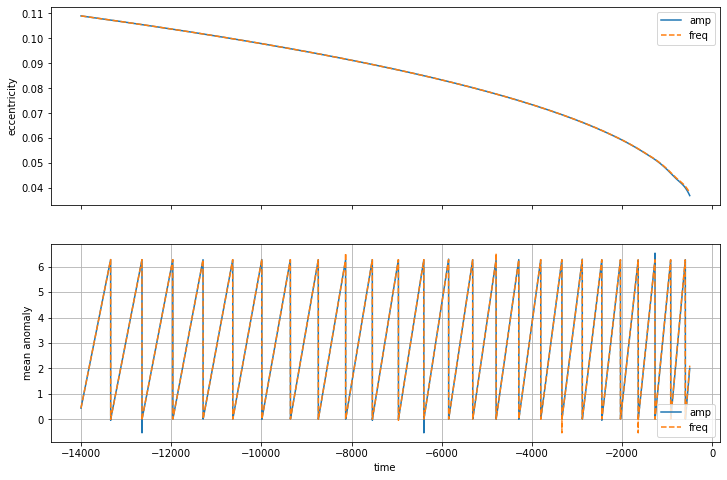

In [19]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
ax[0].plot(ts, eccAmp.measure_ecc(t_ref=ts)[0], label="amp")
ax[1].plot(ts, eccAmp.measure_ecc(t_ref=ts)[1], label="amp")

ax[0].plot(ts, eccFreq.measure_ecc(t_ref=ts)[0], label="freq", ls="--")
ax[1].plot(ts, eccFreq.measure_ecc(t_ref=ts)[1], label="freq", ls="--")

ax[1].set_xlabel("time")
ax[0].set_ylabel("eccentricity")
ax[1].set_ylabel("mean anomaly")
ax[1].grid()
ax[0].legend()
ax[1].legend()

### measuring eccentricity with residual amplitude

In [20]:
t0, strain0 = generate_waveform(approximant="EccentricTD",
                                  q=1.0,
                                  chi1=[0.0, 0.0, 0.0],
                                  chi2=[0.0, 0.0, 0.0],
                                  deltaTOverM=0.1,
                                  Momega0=0.01,
                                  eccentricity=1e-5)

In [22]:
mode_dict_cir = {(2, 2): strain0 / ylm}

In [23]:
dataDict.update({"hlm0": mode_dict_cir, "t0": t0})

In [24]:
eccResAmp = measureEccentricityUsingResidualAmplitude(dataDict)

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/scipy/interpolate/_fitpack2.py:667: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


In [25]:
eccResAmp.measure_ecc(t_ref=-1000), eccAmp.measure_ecc(t_ref=-1000), eccFreq.measure_ecc(t_ref=-1000)

((array(0.04820426), array(5.05011315)),
 (array(0.04733956), array(4.87706216)),
 (array(0.04759875), array(4.9175428)))

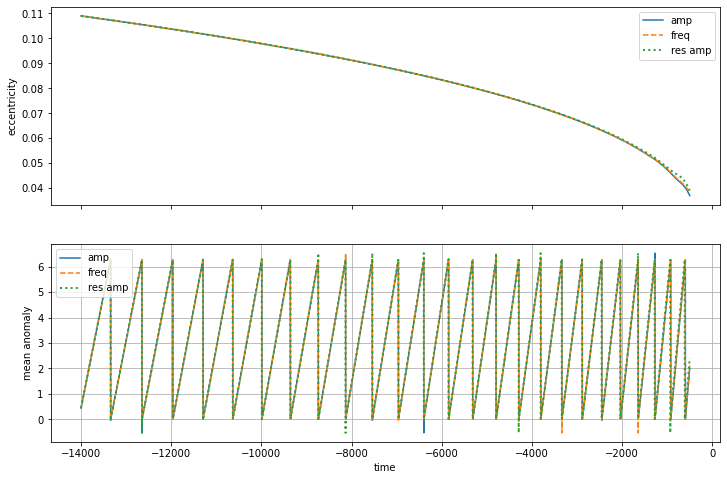

In [26]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
ax[0].plot(ts, eccAmp.measure_ecc(t_ref=ts)[0], label="amp")
ax[1].plot(ts, eccAmp.measure_ecc(t_ref=ts)[1], label="amp")

ax[0].plot(ts, eccFreq.measure_ecc(t_ref=ts)[0], label="freq", ls="--")
ax[1].plot(ts, eccFreq.measure_ecc(t_ref=ts)[1], label="freq", ls="--")

ax[0].plot(ts, eccResAmp.measure_ecc(t_ref=ts)[0], label="res amp", ls=":", lw=2)
ax[1].plot(ts, eccResAmp.measure_ecc(t_ref=ts)[1], label="res amp", ls=":", lw=2)

ax[1].set_xlabel("time")
ax[0].set_ylabel("eccentricity")
ax[1].set_ylabel("mean anomaly")
ax[1].grid()
ax[0].legend()
ax[1].legend()